In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread('Lab1_image.jpeg')

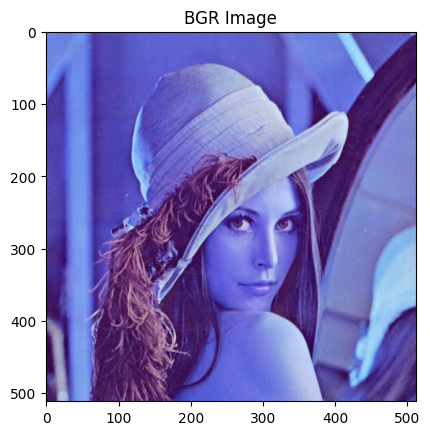

In [16]:
plt.imshow(image)
plt.title("BGR Image")
plt.show()

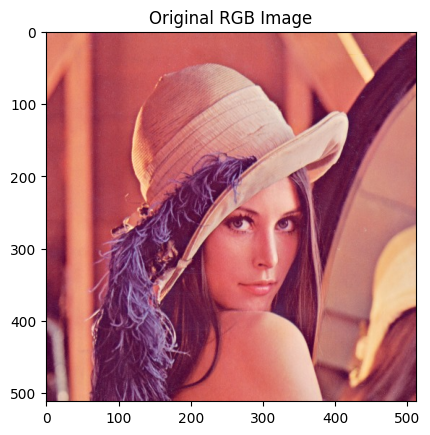

In [17]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.show()

In [18]:
image_size = image.shape
print(f"Image size (Height, Width, Channels): {image_size}")

Image size (Height, Width, Channels): (512, 512, 3)


In [19]:
total_pixels = image_size[0] * image_size[1]
print(f"Total number of pixels in the image: {total_pixels}")

Total number of pixels in the image: 262144


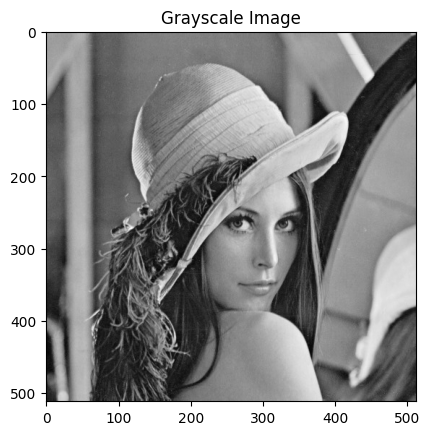

In [20]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

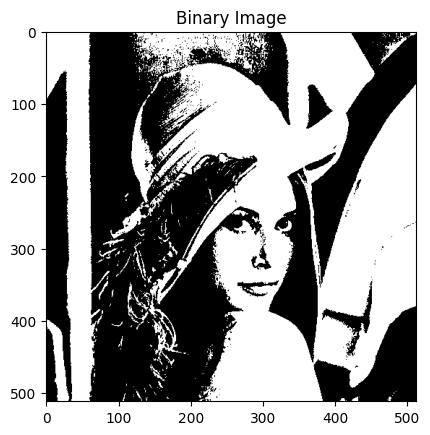

In [21]:
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
# Display the binary image
plt.imshow(image_binary, cmap='gray')
plt.title("Binary Image")
plt.show()

In [22]:
black_pixels = np.sum(image_binary == 0)
print(f"Number of black pixels in the binary image: {black_pixels}")
print(f"Size of the image: {image_size[1]}x{image_size[0]}")

Number of black pixels in the binary image: 128099
Size of the image: 512x512


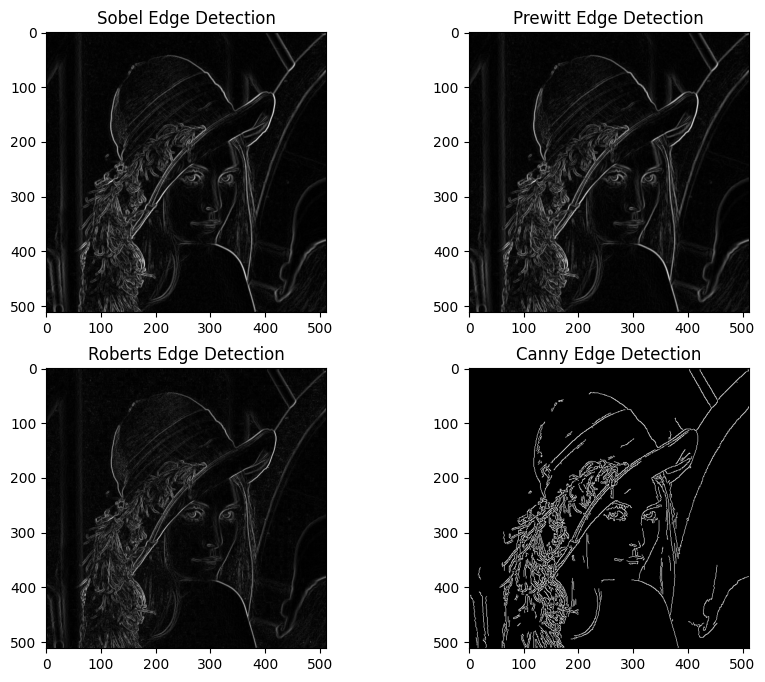

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('Lab1_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
sobel_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)

# Prewitt Edge Detection
prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_edge = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Roberts Edge Detection
roberts_x = cv2.filter2D(image, cv2.CV_64F, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image, cv2.CV_64F, np.array([[0, 1], [-1, 0]]))
roberts_edge = np.sqrt(roberts_x**2 + roberts_y**2)

# Canny Edge Detection
canny_edge = cv2.Canny(image, 100, 200)

# Display the results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(sobel_edge, cmap='gray'), plt.title("Sobel Edge Detection")
plt.subplot(2, 2, 2), plt.imshow(prewitt_edge, cmap='gray'), plt.title("Prewitt Edge Detection")
plt.subplot(2, 2, 3), plt.imshow(roberts_edge, cmap='gray'), plt.title("Roberts Edge Detection")
plt.subplot(2, 2, 4), plt.imshow(canny_edge, cmap='gray'), plt.title("Canny Edge Detection")
plt.show()


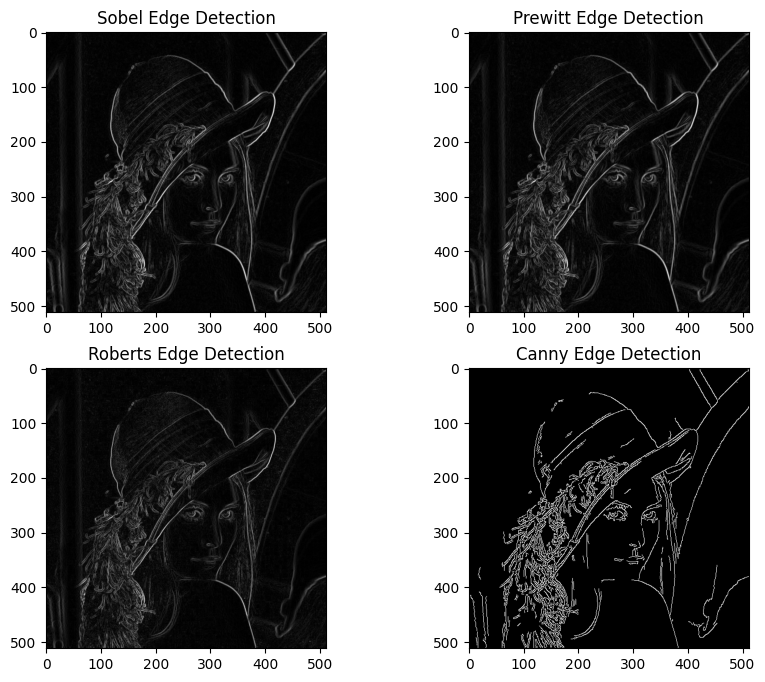

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt,roberts,sobel

image = cv2.imread('Lab1_image.jpeg', cv2.IMREAD_GRAYSCALE)
sobel_edge=sobel(image)
prewitt_edge=prewitt(image)
roberts_edge=roberts(image)
canny_edge = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(sobel_edge, cmap='gray'), plt.title("Sobel Edge Detection")
plt.subplot(2, 2, 2), plt.imshow(prewitt_edge, cmap='gray'), plt.title("Prewitt Edge Detection")
plt.subplot(2, 2, 3), plt.imshow(roberts_edge, cmap='gray'), plt.title("Roberts Edge Detection")
plt.subplot(2, 2, 4), plt.imshow(canny_edge, cmap='gray'), plt.title("Canny Edge Detection")
plt.show()



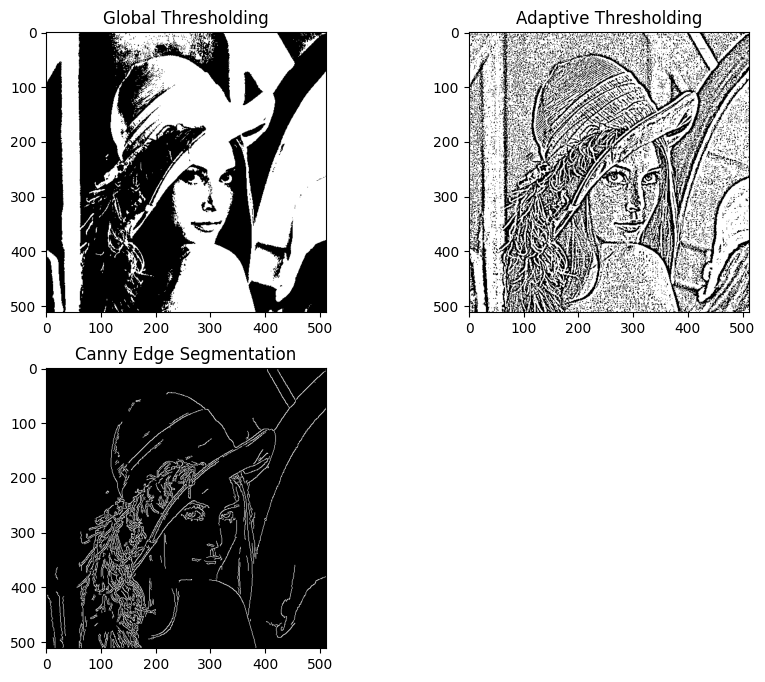

In [25]:
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(global_thresh, cmap='gray'), plt.title("Global Thresholding")
plt.subplot(2, 2, 2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title("Adaptive Thresholding")
plt.subplot(2, 2, 3), plt.imshow(canny_edge, cmap='gray'), plt.title("Canny Edge Segmentation")
# plt.subplot(2, 2, 4), plt.imshow(contour_img), plt.title("Watershed Segmentation")
plt.show()

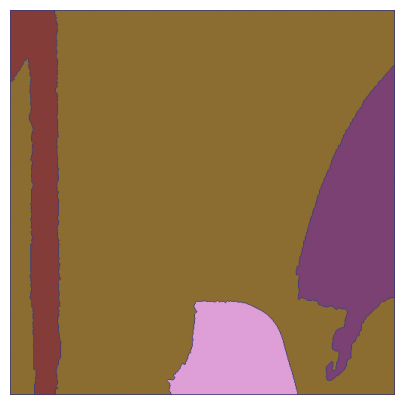

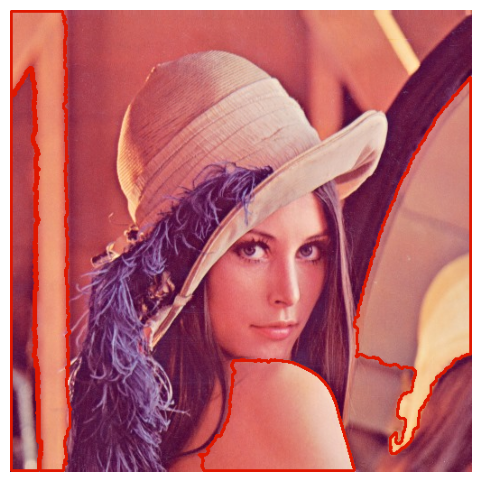

In [26]:

import cv2
import numpy as np

# Load the input image
image = cv2.imread('Lab1_image.jpeg')  # Change to the actual path of your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply Otsu's thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological opening to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area (dilate the opened image)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)

# Convert sure_fg to uint8
sure_fg = np.uint8(sure_fg)

# Find the unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling (background = 0, objects = positive labels)
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all markers so that the background becomes 1 instead of 0
markers = markers + 1

# Mark unknown region as zero
markers[unknown == 255] = 0

# Convert image to color for visualization
watershed_display = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Apply watershed algorithm
cv2.watershed(watershed_display, markers)

# Mark watershed boundaries in red
# watershed_display[markers == -1] = [0, 0, 255]  # Red boundaries


# **Display the Markers**
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

# **Extract and Draw Contours**
labels = np.unique(markers)
coins = []

for label in labels[1:]:  # Ignore background (label=0)
    target = np.where(markers == label, 255, 0).astype(np.uint8)
    contours, _ = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:  # Only add if contours exist
        coins.append(contours[0])

# Draw contours on the image
contour_img = image.copy()
cv2.drawContours(contour_img, coins, -1, color=(0, 23, 223), thickness=2)

# **Show the Resulting Image**
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()